In [2]:
import networkx as nx
import json
import os
import glob
import math
import operator
import json

import matplotlib.pyplot as plt

%matplotlib inline

In [3]:
t_graph = nx.DiGraph()
path = '/Users/adampaquette/Documents/CS 499 (Network Analysis)/networks-sp/tropes/'
time_frame = 'eighties'

with open(path + 'HorrorTropes.json', 'r') as file:
    t_dict = json.load(file)
    
with open(path + time_frame + '/movie_list.json', 'r') as file:
    m_dict = json.load(file)

for key in t_dict.keys():
    t_graph.add_node(key, weight = 0, site = t_dict[key], type = 'trope')
    
for rank, movie in enumerate(m_dict):
    t_graph.add_node(movie, weight = math.ceil(50 - rank), type = 'movie')

In [4]:
for json_file in glob.glob(path + time_frame + "/*.json"):
    
    head, _ = os.path.splitext(json_file)
    _, movie = os.path.split(head)
    
    if movie == 'movie_list':
        continue
    
    with open(json_file, 'r') as file:
        t_dict = json.load(file)
        
        for trope in t_dict:
            t_graph.nodes[trope]['weight'] += t_graph.nodes[movie]['weight']
            t_graph.add_edge(movie, trope)

In [5]:
node_list = []
for n in t_graph.nodes():
    if t_graph.in_degree[n] == 0 and t_graph.nodes[n]['type'] == 'trope':
        node_list.append(n)
        
    if t_graph.out_degree[n] == 0 and t_graph.nodes[n]['type'] == 'movie':
        node_list.append(n)
        
t_graph.remove_nodes_from(node_list)

Most Valued Trope: FinalGirl http://tvtropes.org/pmwiki/pmwiki.php/Main/FinalGirl
List of movies using the most valued Trope: ['GraduationDay', 'ANightmareOnElmStreet4TheDreamMaster', 'FridayThe13ThPartIii', 'ANightmareOnElmStreet', 'ANightmareOnElmStreet3DreamWarriors', 'FridayThe13ThPart2', 'FridayThe13ThPartViiTheNewBlood', 'ANightmareOnElmStreet2FreddySRevenge', 'FridayThe13ThTheFinalChapter', 'FridayThe13Th', 'Halloween4TheReturnOfMichaelMyers', 'ANightmareOnElmStreet5TheDreamChild'] 

Most Used Trope: FinalGirl http://tvtropes.org/pmwiki/pmwiki.php/Main/FinalGirl
Movie with the most tropes: FridayThe13Th
Highest Grosing Film: Gremlins
List of tropes from the highest grossing film: ['HorrorDoesntSettleForSimpleTuesday', 'TheLittleShopThatWasntThereYesterday', 'NightmareFace', 'NothingIsScarier', 'FridgeHorror']
Total number of tropes used: 154


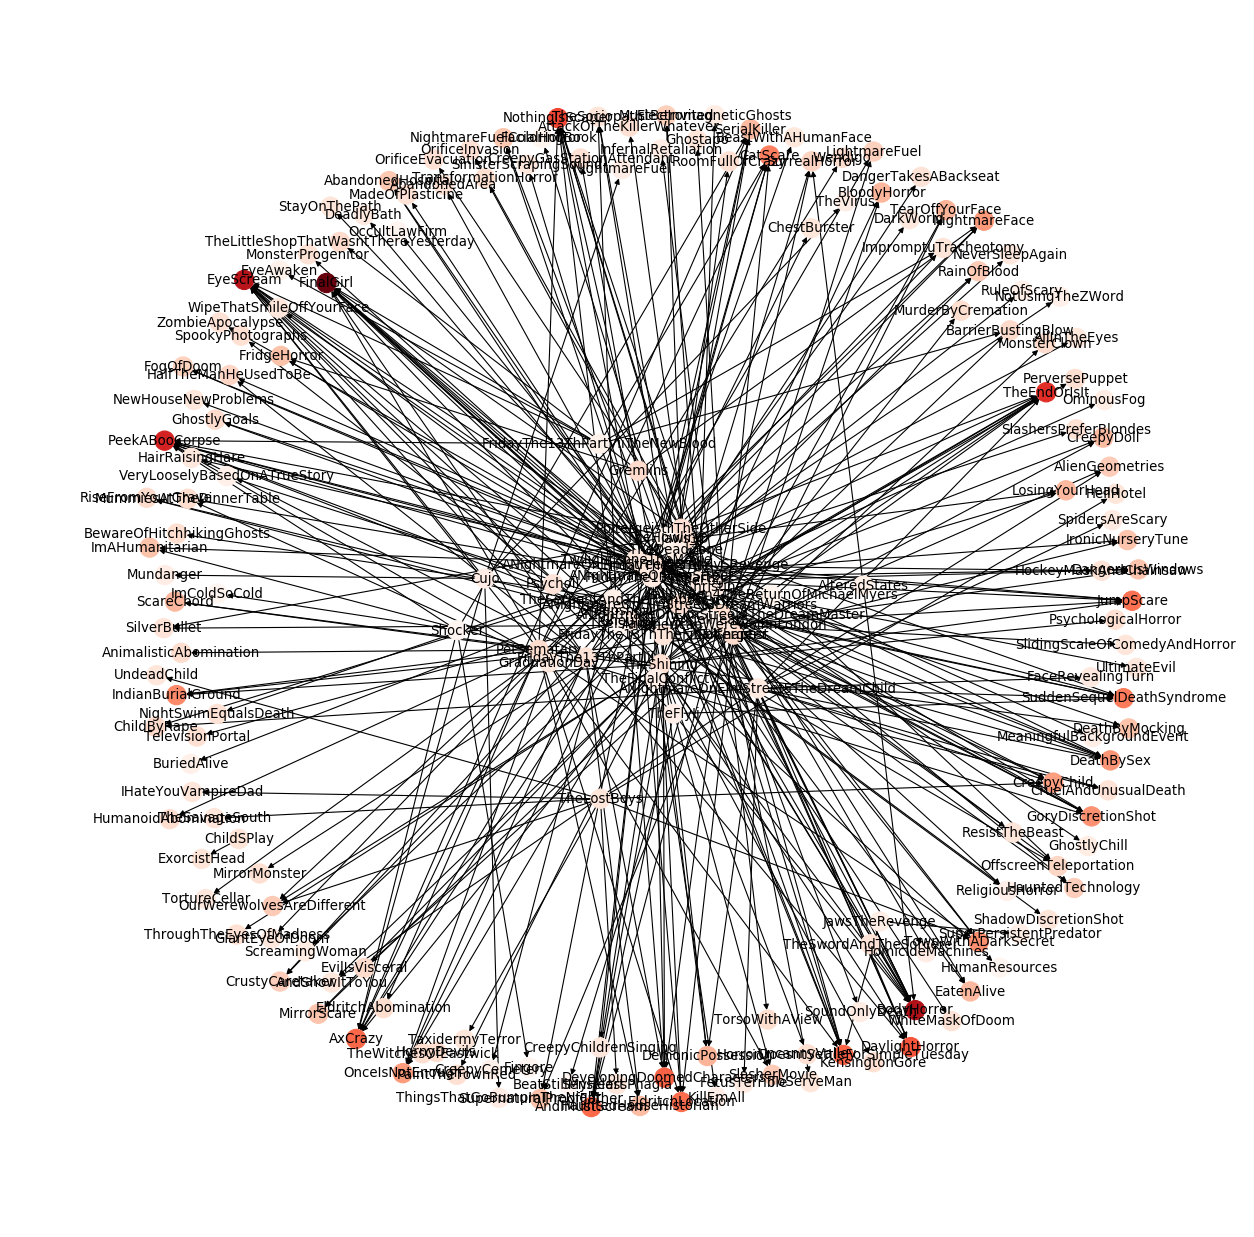

In [6]:
weights = dict(t_graph.nodes(data = 'weight'))
highest_weight = max(weights.keys(), key=(lambda key: weights[key]))
print("Most Valued Trope:", highest_weight, t_graph.nodes()[highest_weight]['site'])

print("List of movies using the most valued Trope:", [i[0] for i in list(t_graph.in_edges(highest_weight))], '\n')

in_degree = dict(t_graph.in_degree)
highest_use = max(in_degree.keys(), key=(lambda key: in_degree[key]))
print("Most Used Trope:", highest_use, t_graph.nodes()[highest_use]['site'])

out_degree = dict(t_graph.out_degree)
most_tropes = max(out_degree.keys(), key=(lambda key: out_degree[key]))
print("Movie with the most tropes:", most_tropes)

highest_gross = [i for i in t_graph.nodes(data = True) if i[1]['type'] == 'movie'][0][0]
print("Highest Grosing Film:", highest_gross)

print("List of tropes from the highest grossing film:", [i[1] for i in list(t_graph.out_edges(highest_gross))])

trope_total = len([i for i in t_graph.nodes(data = True) if i[1]['type'] == 'trope'])
print("Total number of tropes used:", trope_total)

node_colors = list(dict(t_graph.nodes(data='weight')).values())
plt.figure(num=None, figsize=(15, 15), dpi=80)
pos = nx.spring_layout(t_graph,k=0.55,iterations=40)
edge_colors = [200 for i in t_graph.edges()]
nx.draw(t_graph, with_labels=True, node_color=node_colors, cmap = 'Reds', layout = pos)

In [21]:
data = nx.readwrite.json_graph.node_link_data(t_graph)
s1 = json.dumps(data, default={'link': 'edges', 'source': 'from', 'target': 'to'})

with open(path + time_frame + '_graph.json', 'w') as f:
    f.write(s1)